# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.  
  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.  
  
В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating
Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».

## Описание данных
* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.  
Данные за 2016 год могут быть неполными.

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

## Обзор данных

In [3]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Пропущены значения в столбцах:
- *Year_of_Release*, заполнить не представляется возможным, важный параметр для нашего исследования;
- *Name* и *Genre*, пропусков всего 2, а заполнить их не получится;
- *Critic_Score* и *User_Score*, пропусков достаточно много, эти параметры требуются в нашем исследовании. Могут быть не заполнены ввиду осутсвия оценок. Параметры не имеют зависимости от чего-либо, поэтому воссоздать их не получится;
- *Rating* также нужен в нашем исследовании, но заполнить пропуски не получится, так как нет зависимости.

Также следует изменить регистр имен стобцов для более комфортной дальнейшей работы.  
В столбце *User_Score* пристуствует значение tdb, ввиду чего не верный тип данных. Также *Year_of_Release* имеет не верный тип данных.

Подготовим данные:
- приведем имена столбцов к нижнему регистру;
- удалим записи с пропущенными значениями в столбцах *Year_of_Release*, *Name*, *Genre*;
- изменим тип данных *User_Score* и *Year_of_Release*;
- заполним пропуски *Critic_Score* и *User_Score* статическим значением -1;
- заполним пропуски *Rating* значением 'Unknown'.

## Подготовка данных

### Имена стобцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Изменение типов данных

In [8]:
data[data.user_score == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd - to be determined.  
Информации пока нет, поэтому вставим пустые значения на место оценок в таких записях.

In [9]:
data.user_score = pd.to_numeric(data.user_score, errors='coerce')

In [10]:
len(data[data['year_of_release'].isnull()]) / len(data)

0.01609332934489979

In [11]:
data.dropna(subset=['year_of_release'], inplace=True)

In [12]:
data.year_of_release = data.year_of_release.astype('int')

### Заполним пропуски

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [14]:
data.rating = data.rating.fillna('Unknown')

In [15]:
data.dropna(subset=['name'], inplace=True)

In [16]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропуски в *Genre* также удалены.

In [17]:
data.critic_score = data.critic_score.fillna(-1)
data.user_score = data.user_score.fillna(-1)

In [18]:
data['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

### Проверка на дубли

In [19]:
data.duplicated().sum()

0

### Столбец общих продаж

In [20]:
data['total_sales'] = data.na_sales + data.eu_sales + data.jp_sales + data.other_sales

In [21]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Unknown,31.38


## Анализ данных

### Как менялись продажи по платформам

Text(0, 0.5, 'Количество игр')

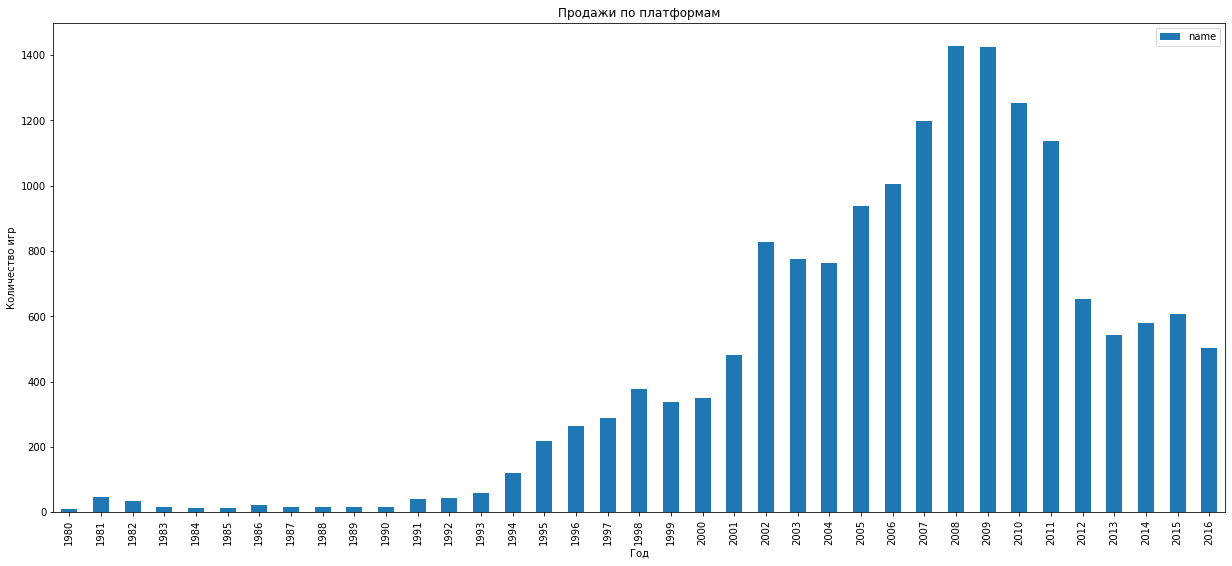

In [22]:
(data
 .groupby('year_of_release')['name']
 .count()
 .reset_index()
 .plot(x = 'year_of_release', y = 'name', kind='bar', figsize=(21,9)))
plt.title('Продажи по платформам')
plt.xlabel('Год')
plt.ylabel('Количество игр')

Пик популярности игр был в 2008-2009 гг.  

### Как менялись продажи по платформам

<AxesSubplot:xlabel='platform'>

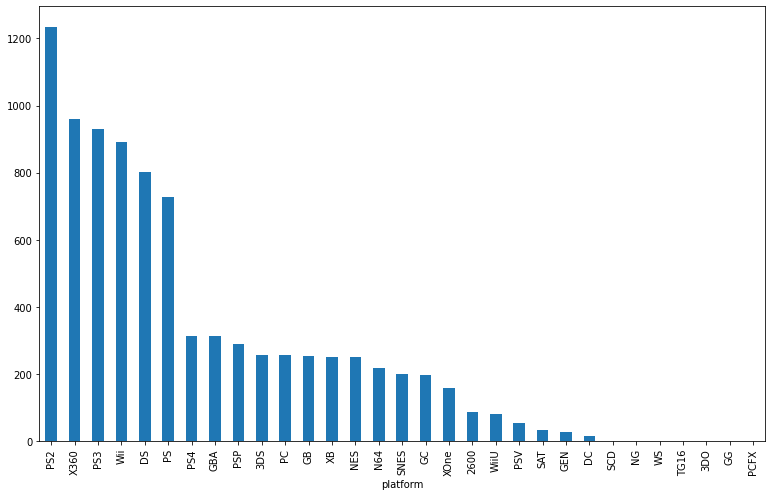

In [23]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind = 'bar', figsize=(13, 8))

Рассмотрим 6 платформ, принесших наибольшую выручку, по отдельности.

PS2


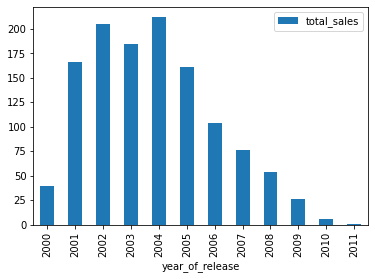

X360


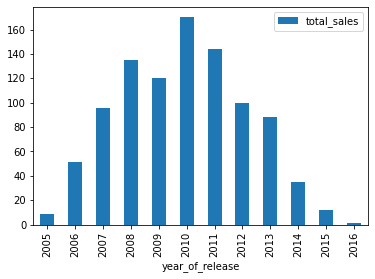

PS3


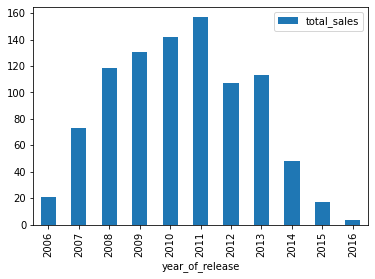

Wii


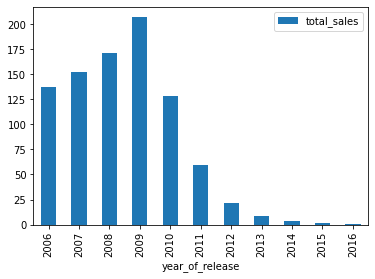

DS


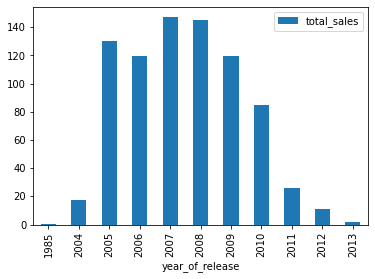

PS


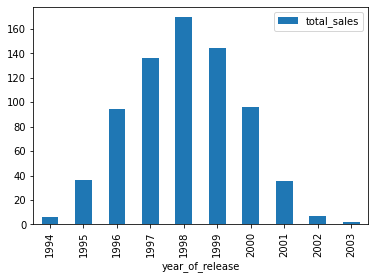

In [24]:
for platform in platform_sales.head(6).index:
    print(platform)
    (data.query('platform == @platform')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
         .plot(kind = 'bar')
    )
    plt.show()

Можно сделать вывод, что жизненый цикл игровой платформы составляет 10 лет.

### Актуальный период. Какие платформы лидируют по продажам, растут или падают?

Актуальными данными будем считать данные за 2014-2016 гг., то есть за последние 3 года.  
Таких данных достаточно, чтобы выделить актульные платформы и понять ситуацию на рынке в текущий момент, что поможет прогнозировать 2017 год.

In [25]:
data_actual = data[data.year_of_release >= 2014]

<AxesSubplot:xlabel='platform'>

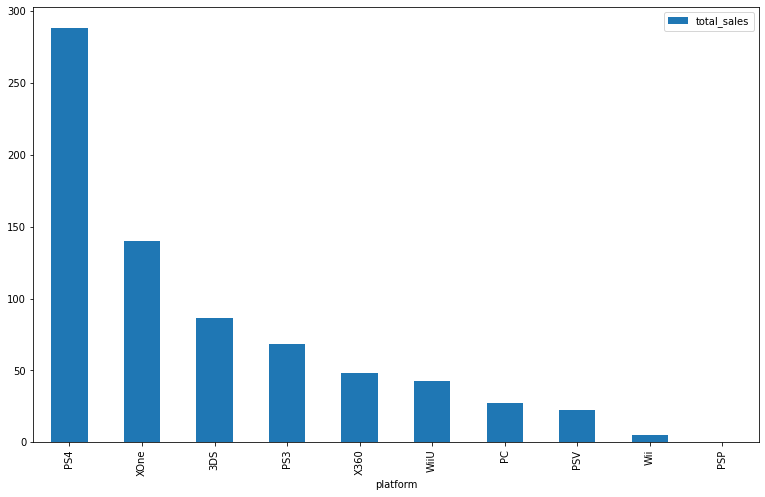

In [26]:
data_actual_platform = (data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .sort_values('total_sales', ascending=False))
data_actual_platform.plot(kind='bar', figsize=(13, 8))

PS4


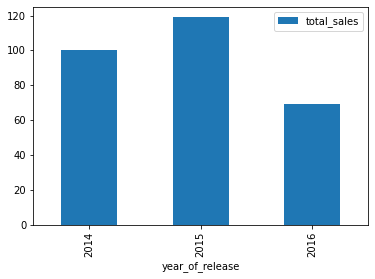

XOne


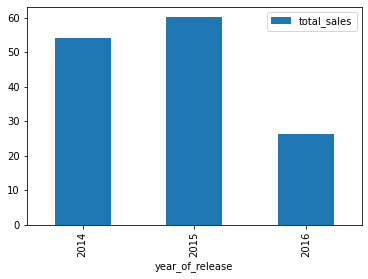

3DS


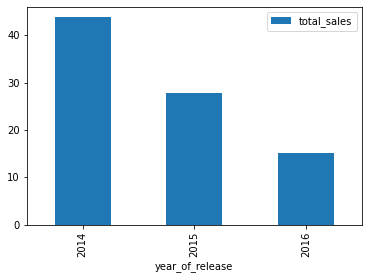

PS3


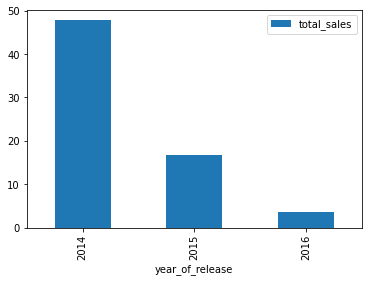

X360


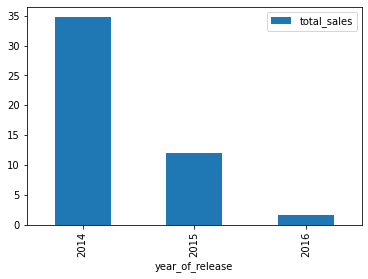

WiiU


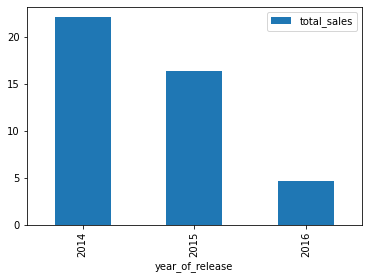

PC


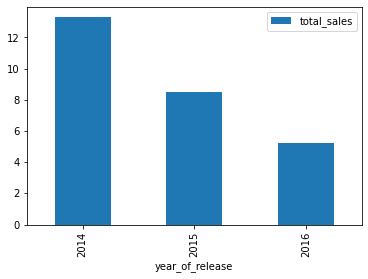

PSV


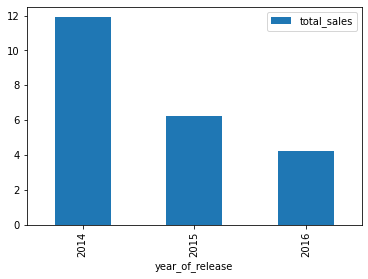

Wii


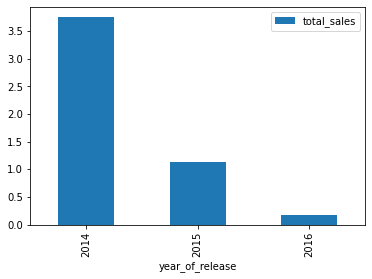

PSP


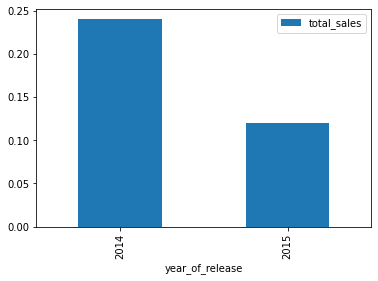

In [27]:
for platform in data_actual_platform.index:
    print(platform)
    (data_actual
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.show()

In [28]:
data_actual.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,Unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,Unknown,7.98


In [29]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Наиболее прибыльные платформы - консоли последнего поколения PS4 и Xbox ONE.  
PS3 и XBOX 360 являются их устаревшими "предками". По графикам видно снижение продаж, их жизненый цикл закончен.  
Исключением является PC, это единственная платформа в наших данных, которая не имеет жизненого цикла. График показывает периодическое повышение спроса, затем подение и очередной отскок.  
WiiU - новое поколение семейства Wii, PSV - семейства PSP.  
Для дальнейшего анализа оставим только актуальыне платформы, устаревшие устарели не только морально и технологически, но и не прибыльны.

In [30]:
data_actual = data_actual[data_actual.platform.isin(['PS4', 'XOne', 'PC', '3DS', 'WiiU', 'PSV'])]

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

[Text(0.5, 1.0, 'Продажи по перспективным платформам за 2014-2016 гг'),
 Text(0.5, 0, 'Платформы'),
 Text(0, 0.5, 'Общие продажи'),
 (0.0, 3.0)]

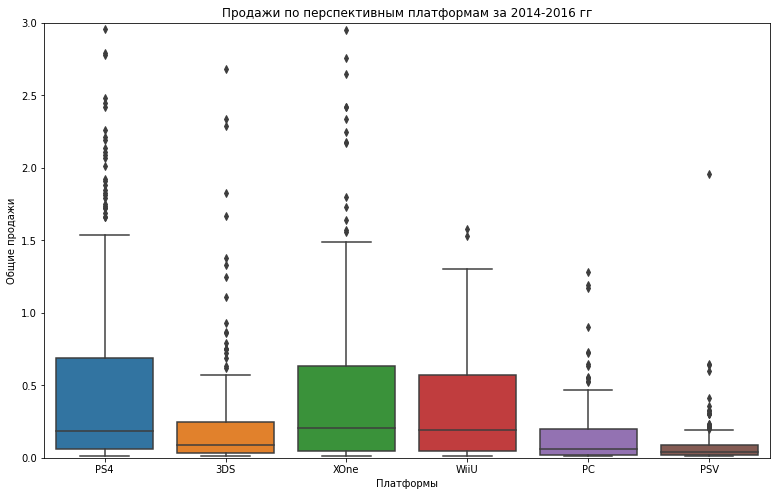

In [31]:
plt.figure(figsize=(13, 8))
(sns.boxplot(x='platform', y='total_sales', data = data_actual)
 .set(title = 'Продажи по перспективным платформам за 2014-2016 гг', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

Наибольшую прибыль приносят консоли PS4, Xbox One и WiiU. У них схожие медианы продаж.  
3DS и PSV - портативные консоли, то есть более специализированный товар. Этим и обусловленые меньшие продажи игр и их количество.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

PS4


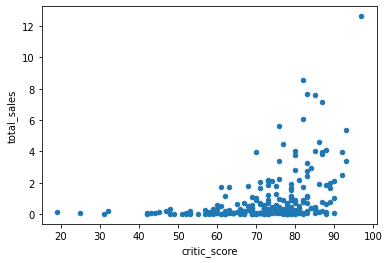

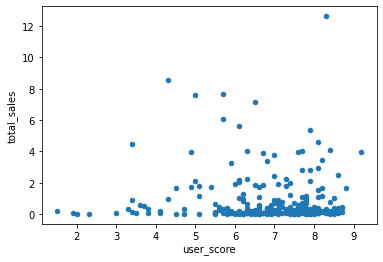

critic_score    0.401903
user_score     -0.043186
total_sales     1.000000
Name: total_sales, dtype: float64
3DS


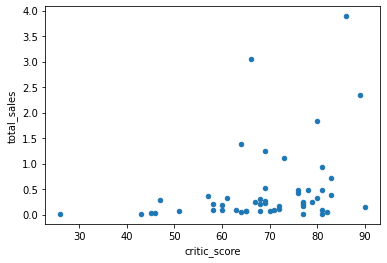

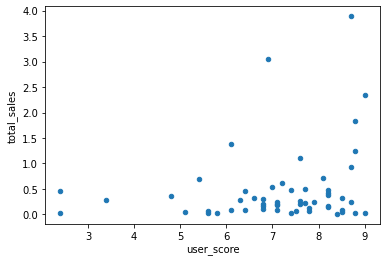

critic_score    0.284686
user_score      0.279850
total_sales     1.000000
Name: total_sales, dtype: float64
XOne


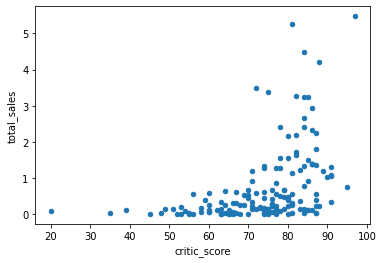

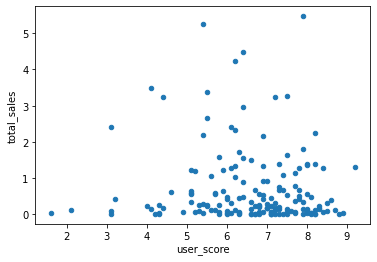

critic_score    0.422112
user_score     -0.091734
total_sales     1.000000
Name: total_sales, dtype: float64
WiiU


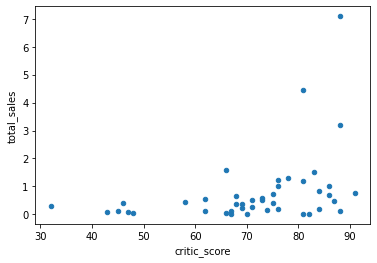

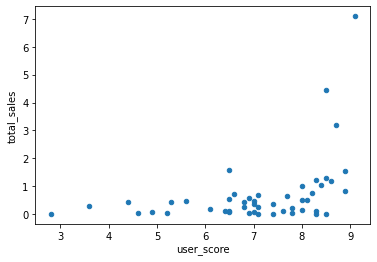

critic_score    0.375640
user_score      0.411451
total_sales     1.000000
Name: total_sales, dtype: float64
PC


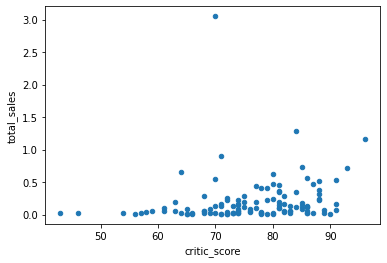

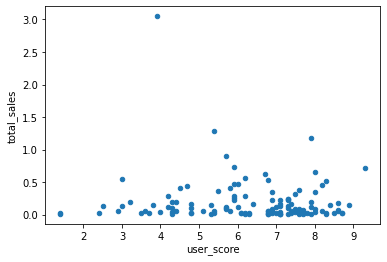

critic_score    0.172061
user_score     -0.089974
total_sales     1.000000
Name: total_sales, dtype: float64
PSV


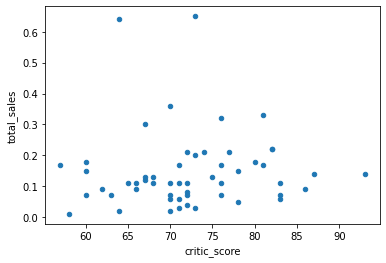

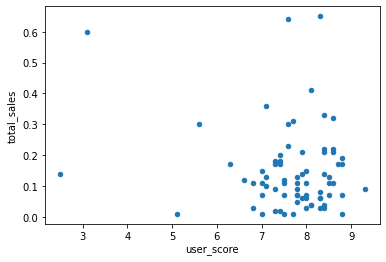

critic_score    0.041029
user_score      0.023528
total_sales     1.000000
Name: total_sales, dtype: float64


In [32]:
for platform in data_actual.platform.unique():
    print('=' * 50)
    print(platform)
    df_i = data_actual.query('platform == @platform')
    df_i.query('critic_score != -1').plot(kind = 'scatter', x = 'critic_score', y = 'total_sales')
    df_i.query('user_score != -1').plot(kind = 'scatter', x = 'user_score', y = 'total_sales')
    plt.show()
    print(df_i[(df_i['critic_score'] != -1) 
                        & (df_i['user_score'] != -1)]
                       [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

В случае стационарных консолей есть слабое влияние отзывов критиков на продажи игр.  
Единственная платформа, на игры к которой прослеживается влияние отзывов пользоватлей - WiiU.

### Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='genre'>

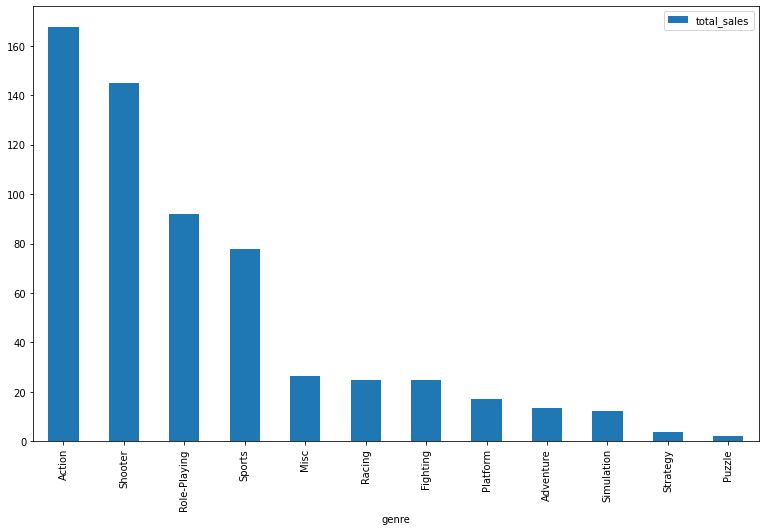

In [33]:
data_actual_genre = (data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')
                        .sort_values('total_sales', ascending=False))
data_actual_genre.plot(kind='bar', figsize=(13, 8))

<AxesSubplot:xlabel='genre'>

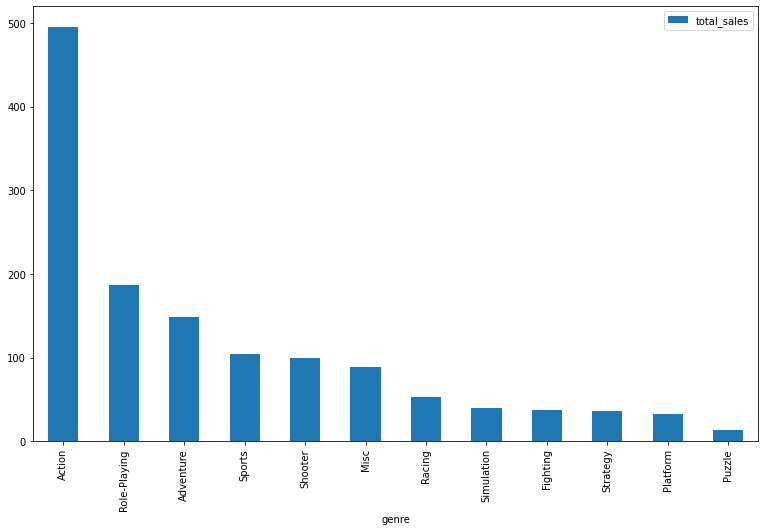

In [34]:
data_actual_genre = (data_actual.pivot_table(index='genre', values='total_sales', aggfunc='count')
                        .sort_values('total_sales', ascending=False))
data_actual_genre.plot(kind='bar', figsize=(13, 8))

[Text(0.5, 1.0, 'Продажи по жанрам за 2014-2016 гг'),
 Text(0.5, 0, 'Жанр'),
 Text(0, 0.5, 'Общие продажи'),
 (0.0, 3.0)]

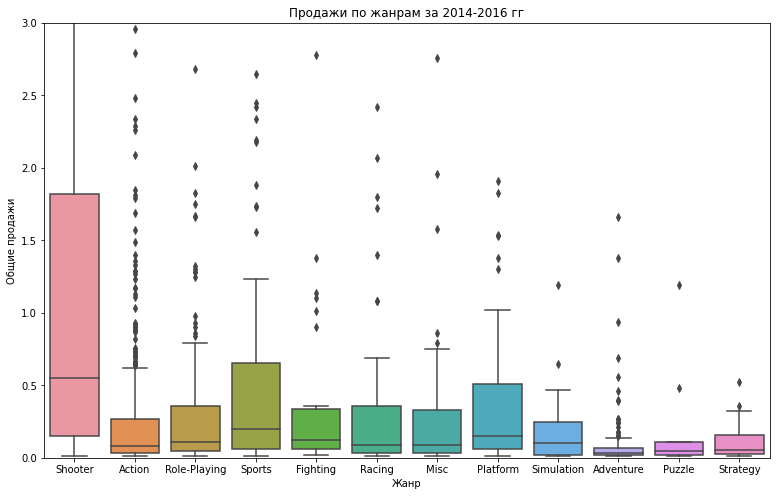

In [35]:
plt.figure(figsize=(13, 8))
(sns.boxplot(x='genre', y='total_sales', data = data_actual)
 .set(title = 'Продажи по жанрам за 2014-2016 гг', xlabel = 'Жанр', ylabel = 'Общие продажи', ylim=(0, 3)))

Наиболее востребоване игры жанров Shooter и Action. Они принесли больше прибыли.  
Также выделяются Role-Playing и Sports.  
При этом "ящик с усами" показывает, что медианное значение продаж больше у игр жанра Shooter, хотя общая прибыль от Action больше.  
Это объясняется количеством игр жанар Action, при этом одна игра Shooter приносит большую прибыль.

## Портрет пользователя каждого региона (NA, EU, JP)

### Топ-5 платформ

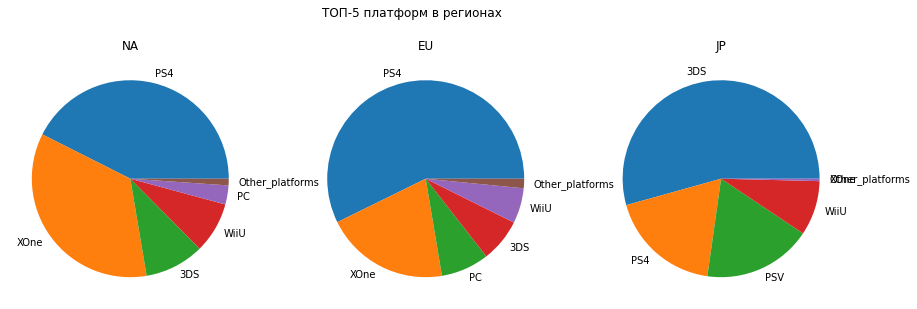

In [36]:
# задаем список регионов
countries = data_actual.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (data_actual.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: data_actual[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Предпочтения пользователей из Северной Америки и Европы схожи.  
В Японии же большая часть пользователей предпочитает портативный гейминг и выбирает соответсвтующие платформы.

In [37]:
data_actual.query('platform == "3DS" or platform == "PSV"')['jp_sales'].sum() / data_actual.jp_sales.sum()

0.7218469851406116

### Топ-5 жанров

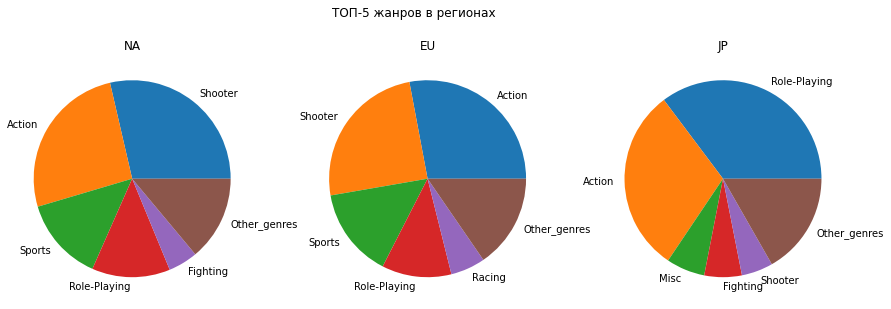

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (data_actual.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_genres
  df_i = df_i.append({'genre': 'Other_genres', countries[i]: data_actual[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Как и с платформами, пользователи Северной Америки и Европы в основном покупают игры 4-х лидирующих жанров.  
В случае же с Японией - пользователи отдают предпочтения иначе.  
Единственный жанр, которому отдают пратическии в равной мере все пользователи - Action.

### ESRB

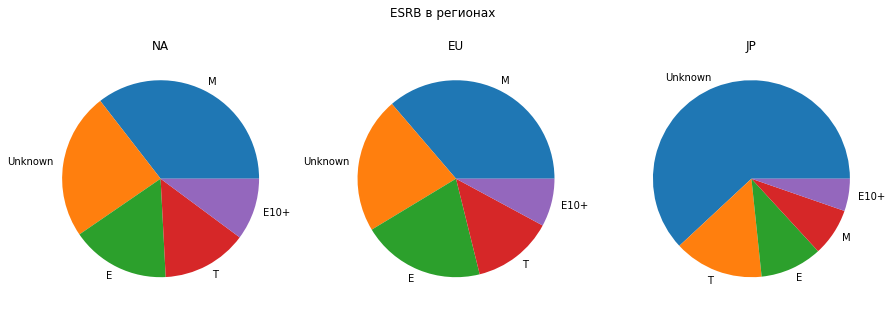

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ESRB в регионах')
for i in range(3):
  
  df_i = (data_actual.groupby('rating')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True)
             )
  axs[i].pie(df_i[countries[i]], labels = df_i['rating'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

В Европе и Северной Америке лучше продаются игры для взрослых (рейтинг M), остальные - примерно одинаково вне зависимости от рейтинга ESRB.  
В японии же наиболее прибыльны игры без рейтинга ESRB. Среди имеющих рейтинг, популярны игры, подходящие для подростков (рейтинг T).
Отсуствие рейтинга может быть следствием более специфического рынка в Японии. Те же игры по анимэ и подобные. Но это рынок азиатской страны, и это предсказуемо, что будет по другому, ввиду абсолютно другого менталитета людей.

## Гипотезы

In [40]:
alpha = .05

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  
Н0 - средние пользовательские рейтинги платформ Xbox One и PC равны.  
Н1 - средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [41]:
data_actual[(data_actual.platform == 'PC') & (data_actual.user_score != -1)]['user_score'].var()

2.901154315133451

In [42]:
data_actual[(data_actual.platform == 'XOne') & (data_actual.user_score != -1)]['user_score'].var()

1.8910066518847013

Дисперсии различаются достаточно сильно, укажем equal_var = False

In [43]:
res1 = st.ttest_ind(
    data_actual[(data_actual.platform == 'PC') & (data_actual.user_score != -1)]['user_score'], 
    data_actual[(data_actual.platform == 'XOne') & (data_actual.user_score != -1)]['user_score'], equal_var=False
)

In [44]:
print(f'pvalue: {res1.pvalue}')
if res1.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

pvalue: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные.

Н0 - средние пользовательские рейтинги жанров Action и Sports равны.  
Н1 - средние пользовательские рейтинги жанров Action и Sports не равны.

In [45]:
data_actual[(data_actual.genre == 'Action') & (data_actual.user_score != -1)]['user_score'].var()

1.8450642355302778

In [46]:
data_actual[(data_actual.genre == 'Sports') & (data_actual.user_score != -1)]['user_score'].var()

2.640450068399453

In [47]:
res2 = st.ttest_ind(
    data_actual[(data_actual.genre == 'Action') & (data_actual.user_score != -1)]['user_score'], 
    data_actual[(data_actual.genre == 'Sports') & (data_actual.user_score != -1)]['user_score'], equal_var=False)

In [48]:
print(f'pvalue: {res2.pvalue}')
if res2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

pvalue: 1.1664151897936176e-08
Отвергаем нулевую гипотезу


## Вывод

Актуальные платформы:
- стационарные консоли PlayStation 4, Xbox ONE, WiiU;
- портативные консоли 3DS и PSV;
- PC.  

Жизненный цикл платформы - 10 лет. При этом прибыльность сильно падает в последние 3 года.

В ходе анализа данных за 2014-2016 гг. по актуальным платформам были сделаны следующие выводы в соответсвии с регоном:
- **Северная Америка и Европа**  
Наиболее прибыльны игры для стационарных консолей последних поколений, а именно PlayStation 4, Xbox ONE и WiiU.
Эти платформы показывают хорушю прибыль втечении 3 лет.  
Наиболее востребованные жанры - Action, Shooter, RPG и Sports. Более 75% пользователей предпочитают эти жанры.  
Лучше продаются игры для взрослых (рейтинг M).
  
- **Япония**
72% выручки приносят игры для портативных консолей. 
Также некоторые пользователи отдают предпочтние PlayStation 4 и WiiU. Доля остальных платформ очень мала.  
Наибольшую прибыль приносят игры жанров Action и RPG.  
Лучше продаются игры для подростков (рейтинг T).
  
Средние пользовательские рейтинги платформ Xbox One и PC близки.  
Средние пользовательские рейтинги жанров Action и Sports не равны.